In [1]:
%pip install "openai-agents[viz]" -qU

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# to install graphviz: https://www.graphviz.org/download

In [6]:
from agents import Agent, Runner, function_tool, handoff, RunContextWrapper
from agents.extensions.visualization import draw_graph

@function_tool
def print_something():
    print("blah blah")

history_tutor_agent = Agent(
    name="History Tutor",
    handoff_description="Specialist agent for historical questions",
    instructions="You provide assistance with historical queries. Explain important events and context clearly.",
)

math_tutor_agent = Agent(
    name="Math Tutor",
    handoff_description="Specialist agent for math questions",
    instructions="You provide assistance with math queries. Explain your reasoning at each step and include examples"
)

def on_math_handoff(ctx: RunContextWrapper[None]):
    print("Handing off to math tutor agent")

def on_history_handoff(ctx: RunContextWrapper[None]):
    print("Handing off to history tutor agent")

# This agent has the capability to handoff to either the history or math tutor agent
triage_agent = Agent(
    name="Triage Agent",
    instructions="You determine which agent to use based on the user's homework question." +
    "If neither agent is relevant, provide a general response.",
    handoffs=[handoff(history_tutor_agent, on_handoff=on_history_handoff), 
              handoff(math_tutor_agent, on_handoff=on_math_handoff)],
    tools=[print_something]
)

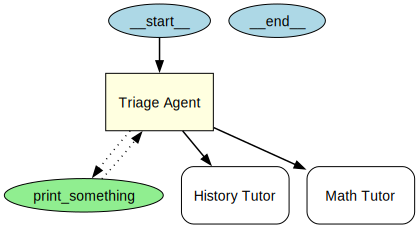

In [5]:
draw_graph(triage_agent)